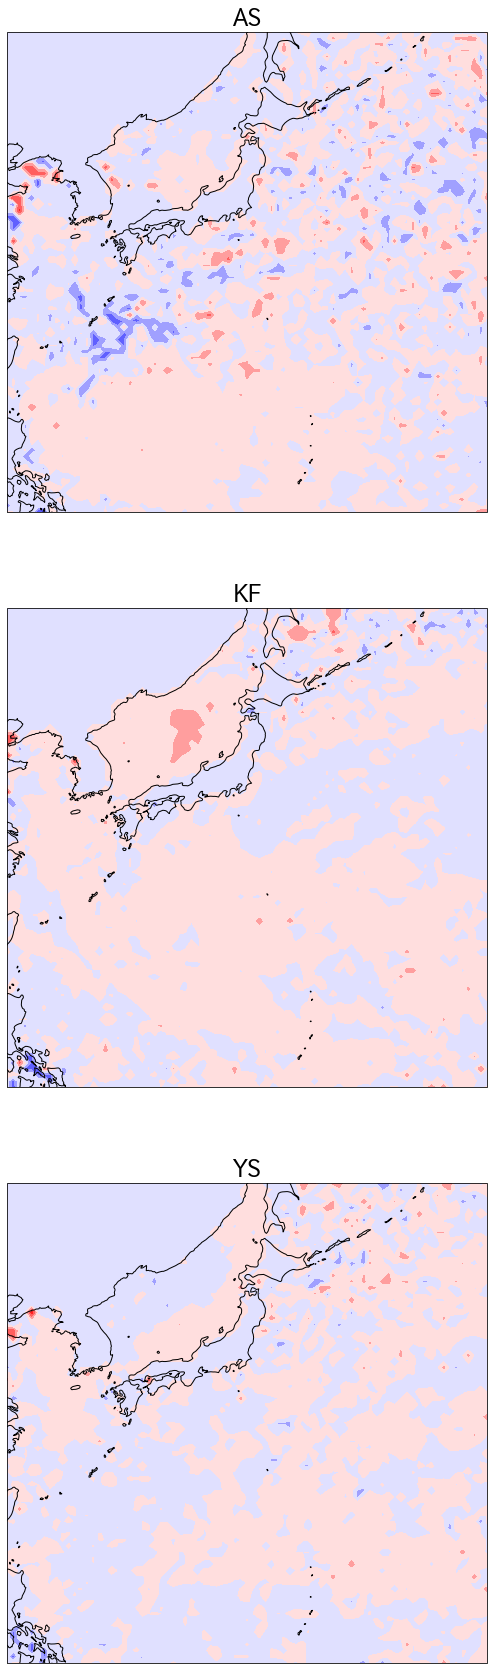

In [57]:
from csv import reader
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import japanize_matplotlib


"""モデル間の最大値比較の図を出力"""

MODEL = ['AS', 'KF', 'YS']

with open('../lats.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    lats = list(csv_reader)
with open('../lons.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    lons = list(csv_reader)

for i in range(79):
    for j in range(79):
        lats[i][j] = float(lats[i][j])
        lons[i][j] = float(lons[i][j])

lat_s = lats[0][0]
lat_n = lats[0][-1]
lon_w = lons[0][0]
lon_e = lons[-1][0]

DATA = []

for i in range(len(MODEL)):
    # モデル名
    model = MODEL[i]
    # 各地点の最大値
    data_f = np.zeros((79, 79))  # 未来
    data_p = np.zeros((79, 79))  # 過去

    # 将来
    with open('../csv2/' + 'HFA_' + model + '_c0_POT.csv', 'r') as csv_file:
        csv_reader = reader(csv_file)
        POT_ALL = list(csv_reader)
        for index in range(79 * 79):
            POT = POT_ALL[index]
            s = [float(val) for val in POT]
            if len(s) > 1:
                data_f[index // 79][index % 79] = max(s)
            else:
                data_f[index // 79][index % 79] = 0
    # 過去
    with open('../csv2/' + 'HPA_' + model + '_POT.csv', 'r') as csv_file:
        csv_reader = reader(csv_file)
        POT_ALL = list(csv_reader)
        for index in range(79 * 79):
            POT = POT_ALL[index]
            s = [float(val) for val in POT]
            if len(s) > 1:
                data_p[index // 79][index % 79] = max(s)
            else:
                data_p[index // 79][index % 79] = 0
    
    # 将来と過去の差分
    data = data_f - data_p
    DATA.append(data)

# 描画
fig = plt.figure(figsize=(10, 30), facecolor='white')
levels = np.arange(-16, 17, 4)
ax1 = fig.add_subplot(3, 1, 1, projection=ccrs.PlateCarree())
a = plt.contourf(lons, lats, DATA[0], levels=levels, transform=ccrs.PlateCarree(), cmap='bwr')
ax1.coastlines()
ax1.set_title(MODEL[0], fontsize=24)

ax2 = fig.add_subplot(3, 1, 2, projection=ccrs.PlateCarree()) 
a = plt.contourf(lons, lats, DATA[1], levels=levels, transform=ccrs.PlateCarree(), cmap='bwr')
ax2.coastlines()
ax2.set_title(MODEL[1], fontsize=24)

ax3 = fig.add_subplot(3, 1, 3, projection=ccrs.PlateCarree()) 
a = plt.contourf(lons, lats, DATA[2], levels=levels, transform=ccrs.PlateCarree(), cmap='bwr')
ax3.coastlines()
ax3.set_title(MODEL[2], fontsize=24)

# fig.suptitle('未来の最大波高と過去の最大波高の差分')
plt.savefig("最大波高の変化.png")
plt.show()

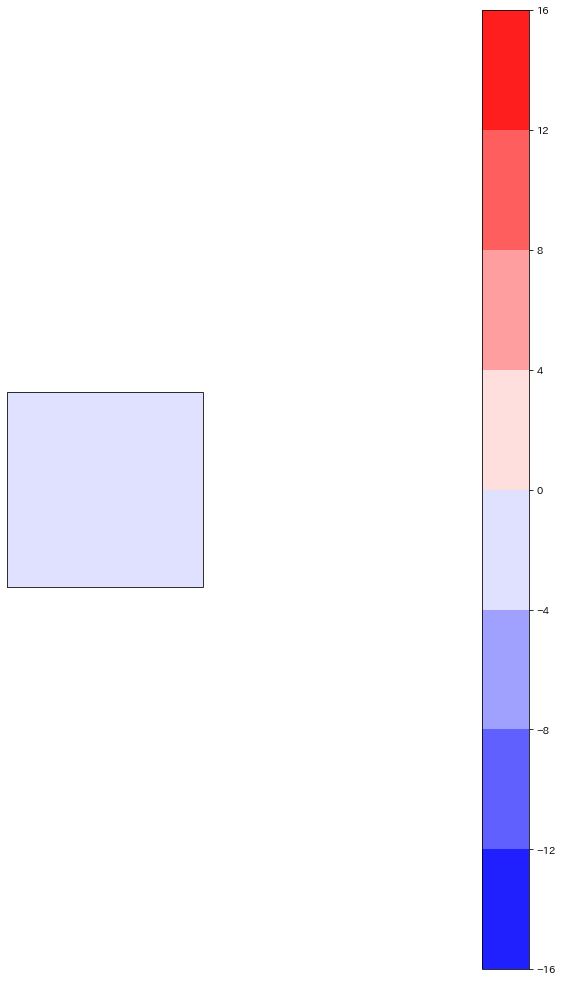

In [58]:
# メモリ出力用
fig = plt.figure(figsize=(10, 30), facecolor='white')
levels = np.arange(-16, 17, 4)
ax1 = fig.add_subplot(3, 1, 1, projection=ccrs.PlateCarree())
a = plt.contourf(lons, lats, np.zeros((79, 79)), levels=levels, transform=ccrs.PlateCarree(), cmap='bwr')
c_bar = plt.colorbar(a, shrink=2.0, pad=0.5)
# c_bar.set_label('Hs[m]')
plt.savefig('カラーバー')